In [2]:
import sys
print(sys.executable)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


C:\Users\KIIT\AppData\Local\Programs\Python\Python313\python.exe


✅ Dataset Loaded Successfully!

      ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EX

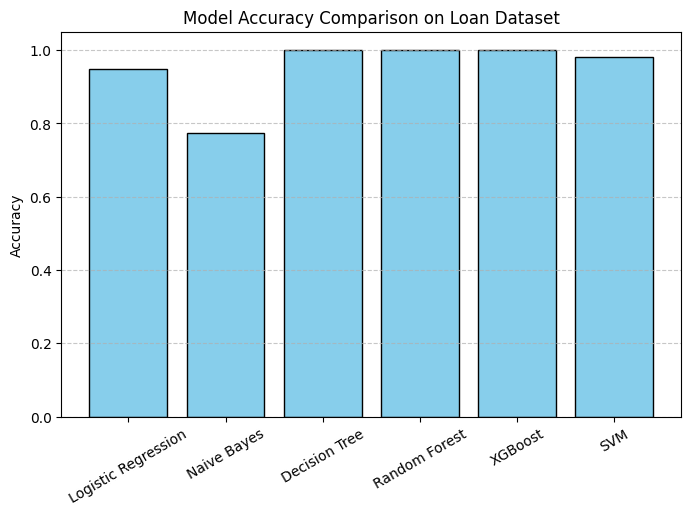

In [3]:
# Load dataset
df = pd.read_csv("data/loan_default.csv")  # Adjust path if needed
print("✅ Dataset Loaded Successfully!\n")
print(df.head())

# Drop unnecessary columns
if "ID" in df.columns:
    df.drop(columns=["ID"], inplace=True)

# Fill missing values with mode (most frequent)
df.fillna(df.mode().iloc[0], inplace=True)

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Split data
X = df.drop("Status", axis=1)
y = df["Status"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Standardize numeric data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42),
    "SVM": SVC()
}

# Train, predict, evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
results = {}

for name, model in models.items():
    print("========================================")
    print(f"Model: {name}")
    print("========================================")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print("✅ Accuracy:", round(acc, 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

# Compare results
df_results = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print("===== MODEL ACCURACY COMPARISON =====")
print(df_results)

# Plot comparison
plt.figure(figsize=(8,5))
plt.bar(df_results["Model"], df_results["Accuracy"], color="skyblue", edgecolor="black")
plt.title("Model Accuracy Comparison on Loan Dataset")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.ylim(0,1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
